<a href="https://colab.research.google.com/github/chetansolanke14/machine_learning/blob/master/Experiment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

The objective of this experiment is to understand Random Forest algorithm.

In this experiment we will use MNIST dataset.

#### Keywords

* Random forests
* MNIST
* Cross validation
* Precision
* Recall
* f1-score

In [0]:
#@title Experiment Explanation Video
from IPython.display import HTML

HTML("""<video width="500" height="300" controls>
  <source src="https://cdn.talentsprint.com/talentsprint/archives/sc/aiml/aiml_2018_blr_b6/cfus/week_8/module_2_week_8_experment_2.mp4" type="video/mp4">
</video>
""")

### Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P181901451" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9822140781" #@param {type:"string"}


In [16]:
#@title Run this cell to complete the setup for this Notebook

from IPython import get_ipython
ipython = get_ipython()
  
notebook="BLR_M2W8_SAT_EXP_2" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
   
   print ("Setup completed successfully")
   return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "id" : Id, "file_hash" : file_hash, "notebook" : notebook}

      r = requests.post(url, data = data)
      print("Your submission is successful.")
      print("Ref Id:", submission_id)
      print("Date of submission: ", datetime.datetime.now().date().strftime("%d %b %Y"))
      print("Time of submission: ", datetime.datetime.now().time().strftime("%H:%M:%S"))
      print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
      print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


#### Expected time to complete this experiment is : 60 min

#### Importing the Required Packages

In [0]:

# Load the library with the digits dataset


from sklearn.datasets import load_digits

# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier

# Load pandas
import pandas as pd

# Load numpy
import numpy as np

# Set random seed
np.random.seed(0)

#### Loading the dataset from the Sklearn datasets package

In [18]:
# Create an object called iris with the iris data
digits = load_digits()

# Create a dataframe with the four feature variables
df = pd.DataFrame(digits.data)

# View the top 5 rows
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [0]:
labels = digits.target

In [20]:
labels

array([0, 1, 2, ..., 8, 9, 8])

#### To get sense of the data let us visualize the data

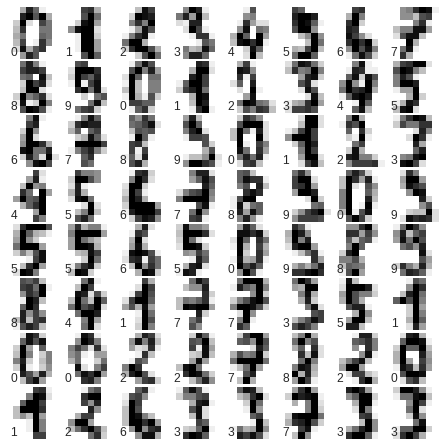

In [21]:
# set up the figure
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

#### Training the data

In [0]:

from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)



In [23]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))


              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      0.95      0.97        44
           2       0.95      1.00      0.98        42
           3       0.98      0.98      0.98        45
           4       0.97      1.00      0.99        37
           5       0.98      0.96      0.97        49
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

   micro avg       0.98      0.98      0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



**Exercise 1:** 

Classify using Decision Tree and compare the results obtained with that of the random forests

In [0]:
### Your code Here
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier()
model1.fit(Xtrain,ytrain)
ypred1 = model1.predict(Xtest)

In [26]:
from sklearn import metrics
print(metrics.classification_report(ypred1, ytest))


              precision    recall  f1-score   support

           0       0.92      0.87      0.89        39
           1       0.88      0.86      0.87        44
           2       0.77      0.69      0.73        49
           3       0.76      0.71      0.73        48
           4       0.87      0.87      0.87        38
           5       0.88      0.91      0.89        46
           6       0.94      0.96      0.95        51
           7       0.75      1.00      0.86        36
           8       0.83      0.82      0.82        49
           9       0.79      0.74      0.76        50

   micro avg       0.84      0.84      0.84       450
   macro avg       0.84      0.84      0.84       450
weighted avg       0.84      0.84      0.84       450



**Exercise 2:**
Understand the various hyperparmeters present in RandomForest Classifier, Experiment with different values for them and observe the changes in the result. Provide your observations in the below text cell in atleast 50 words.

####Your Description here

n_estimators:
It defines the number of decision trees to be created in a random forest.
Generally, a higher number makes the predictions stronger and more stable, but a very large number can result in higher training time.
criterion:
It defines the function that is to be used for splitting.
The function measures the quality of a split for each feature and chooses the best split.
max_features :
It defines the maximum number of features allowed for the split in each decision tree.
Increasing max features usually improve performance but a very high number can decrease the diversity of each tree.
max_depth:
Random forest has multiple decision trees. This parameter defines the maximum depth of the trees.
min_samples_split:
Used to define the minimum number of samples required in a leaf node before a split is attempted.
If the number of samples is less than the required number, the node is not split.
min_samples_leaf:
This defines the minimum number of samples required to be at a leaf node.
Smaller leaf size makes the model more prone to capturing noise in train data.
max_leaf_nodes:
This parameter specifies the maximum number of leaf nodes for each tree.
The tree stops splitting when the number of leaf nodes becomes equal to the max leaf node.
n_jobs:
This indicates the number of jobs to run in parallel.
Set value to -1 if you want it to run on all cores in the system.

In [36]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       1.00      0.98      0.99        44
           2       0.95      1.00      0.98        42
           3       0.98      0.96      0.97        46
           4       0.97      1.00      0.99        37
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

   micro avg       0.98      0.98      0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In [38]:
clf = RandomForestClassifier(n_estimators=800, max_depth=10,max_features='auto',max_leaf_nodes=10,random_state=0)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      0.98      0.98        43
           2       0.95      1.00      0.98        42
           3       0.98      0.96      0.97        46
           4       0.97      1.00      0.99        37
           5       0.98      0.96      0.97        49
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

   micro avg       0.98      0.98      0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



**Exercise 3:** (optional)

Implement your own random forest classifier (Don't use randomforest from sklearn directly, however you can use decision tree from sklearn and build a random forest from those Decision trees
)

In [0]:
### Your code Here

### Please answer the questions below to complete the experiment:

In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging me" #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "test" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["Yes", "No"]

In [42]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 8238
Date of submission:  05 Jan 2019
Time of submission:  11:18:57
View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions
For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.
